# Bài tập
1. Dùng 2 thuật toán Gradient Descent còn lại để tìm bộ Weight theo Heigh trong data fish.
2. Dùng 3 thuật toán Gradient Descent đã học để tìm bộ Weight theo Height và Width trong data fish.
3. Cho biết Weights tốt nhất cho các mô hình trên (Gợi ý: Nên lưu lại từng bộ Weights sau mỗi epoch) (cho câu 2 cả 3 thuật toán).

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# BGD
def bgd(w, learning_rate, iterations):
    global X, y, n

    def grad(w):
        return 1 / n * X.T.dot(X.dot(w) - y)

    for i in range(iterations):
        w = w - learning_rate * grad(w)
        loss = np.mean(np.square(X.dot(w) - y))
        print(f'Loss at iter {i}: {loss}')
    print(f'Final loss: {loss}')
    print(f'Final W: {w}')
    return w


# SGD
def sgd(w, learning_rate, iterations):
    global X, y, n

    def grad(w):
        return X_j.T.dot(X_j.dot(w) - y_j)

    for i in range(iterations):
        rd_id = np.random.permutation(n)
        for j in rd_id:
            X_j = np.array([X[j, :]])
            y_j = np.array([y[j, :]])
            w = w - learning_rate * grad(w)
        loss = np.mean(np.square(X.dot(w) - y))
        print(f'Loss at iter {i}: {loss}')
    print(f'Final loss: {loss}')
    print(f'Final W: {w}')
    return w


# Mini GD
def mgd(w, learning_rate, iterations):
    global X, y, n
    first_X = X.copy()
    first_y = y.copy()

    def grad(w):
        n_j = X_j.shape[0]
        return 1 / n_j * X_j.T.dot(X_j.dot(w) - y_j)

    for i in range(iterations):
        indices = np.random.permutation(n)
        first_X = first_X[indices]
        first_y = first_y[indices]
        temp = 20
        for j in range(0, n, temp):
            X_j = first_X[j:temp, :]
            y_j = first_y[j:temp, :]
            w = w - learning_rate * grad(w)
            temp += temp if n - temp >= temp else n
        loss = np.mean(np.square(X.dot(w) - y))
        print(f'Loss at iter {i}: {loss}')
    print(f'Final loss: {loss}')
    print(f'Final W: {w}')
    return w

In [3]:
# Load Fish dataset
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Câu 1

In [4]:
# Data
X_0 = np.array([df['Height'].values]).T
y = np.array([df['Weight'].values]).T

In [5]:
# Add one to X
X = np.concatenate((X_0, np.ones((X_0.shape[0], 1))), axis=1)
# n samples
n = X.shape[0]
# Initial w
w = np.array([[1647], [0]])

### BGD

In [6]:
w_bgd = bgd(w, 0.01, 10)

Loss at iter 0: 65613.75546247416
Loss at iter 1: 60529.033818627446
Loss at iter 2: 60528.93148128281
Loss at iter 3: 60528.93147858013
Loss at iter 4: 60528.93147793944
Loss at iter 5: 60528.931477301136
Loss at iter 6: 60528.93147666518
Loss at iter 7: 60528.93147603154
Loss at iter 8: 60528.93147540025
Loss at iter 9: 60528.931474771256
Final loss: 60528.931474771256
Final W: [[  60.49911967]
 [-144.41638418]]


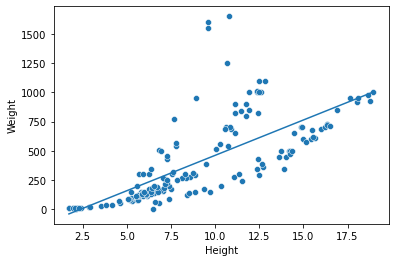

In [7]:
fig1 = sns.scatterplot(x="Height", y="Weight", data=df)
fig2 = sns.lineplot(x=df.loc[:, "Height"].values, y=np.matmul(X, w_bgd).reshape(-1, ))

### SGD

In [8]:
w_sgd = sgd(w, 0.0001, 10)

Loss at iter 0: 10356722.104085593
Loss at iter 1: 483887.85058187804
Loss at iter 2: 78085.21039489807
Loss at iter 3: 60819.667734210925
Loss at iter 4: 60535.96490814717
Loss at iter 5: 60530.03355782538
Loss at iter 6: 60578.25444256278
Loss at iter 7: 60537.85141299946
Loss at iter 8: 60530.790547664685
Loss at iter 9: 60530.76526900709
Final loss: 60530.76526900709
Final W: [[  60.59519608]
 [-143.98600731]]


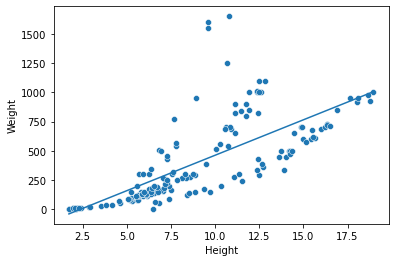

In [9]:
fig1 = sns.scatterplot(x="Height", y="Weight", data=df)
fig2 = sns.lineplot(x=df.loc[:, "Height"].values, y=np.matmul(X, w_sgd).reshape(-1, ))

### Mini GD

In [10]:
w_mgd = mgd(w, 0.001, 10)

Loss at iter 0: 47950597.6567175
Loss at iter 1: 9133784.816447286
Loss at iter 2: 1734524.5096836097
Loss at iter 3: 387457.03709596593
Loss at iter 4: 124129.00410052722
Loss at iter 5: 74625.82549142023
Loss at iter 6: 63687.68676655646
Loss at iter 7: 61491.413204090444
Loss at iter 8: 60596.13168713864
Loss at iter 9: 60531.079710486505
Final loss: 60531.079710486505
Final W: [[  60.6548357 ]
 [-144.50778683]]


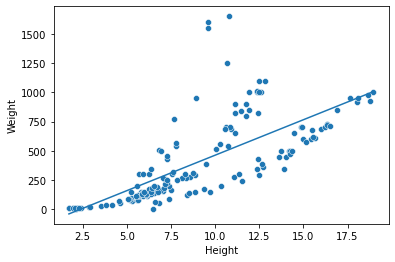

In [11]:
fig1 = sns.scatterplot(x="Height", y="Weight", data=df)
fig2 = sns.lineplot(x=df.loc[:, "Height"].values, y=np.matmul(X, w_mgd).reshape(-1, ))

## Câu 2

In [12]:
from sklearn.model_selection import train_test_split

# Split the data/targets into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, ["Height", "Width"]].values, df.loc[:, "Weight"].values,
                                                    test_size=0.2, random_state=1)
y_train = y_train.reshape(-1, 1)
y = y_train

In [13]:
# Add one to X
X = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)
# n samples
n = X.shape[0]
# Initial w
w = np.array([[-300], [450], [-360]])

### BGD

In [14]:
w_bgd = bgd(w, 0.01, 1000)

Loss at iter 0: 360544.8942394762
Loss at iter 1: 211816.0425692724
Loss at iter 2: 199608.11411430902
Loss at iter 3: 194600.74201557238
Loss at iter 4: 190082.49309923415
Loss at iter 5: 185702.1667112621
Loss at iter 6: 181438.57021531017
Loss at iter 7: 177287.70825103938
Loss at iter 8: 173246.5540808811
Loss at iter 9: 169312.20573071827
Loss at iter 10: 165481.8402465166
Loss at iter 11: 161752.70940404382
Loss at iter 12: 158122.1376195814
Loss at iter 13: 154587.52002414444
Loss at iter 14: 151146.32059421777
Loss at iter 15: 147796.07033218697
Loss at iter 16: 144534.36549487468
Loss at iter 17: 141358.86586889674
Loss at iter 18: 138267.29309159936
Loss at iter 19: 135257.42901637452
Loss at iter 20: 132327.1141211775
Loss at iter 21: 129474.24595910804
Loss at iter 22: 126696.777649941
Loss at iter 23: 123992.7164115256
Loss at iter 24: 121360.12212999881
Loss at iter 25: 118797.10596778765
Loss at iter 26: 116301.82900840079
Loss at iter 27: 113872.50093703854
Loss at iter

### SGD

In [15]:
w_sgd = sgd(w, 0.0001, 1000)

Loss at iter 0: 318136.0361578029
Loss at iter 1: 209066.16165505265
Loss at iter 2: 196575.15453641824
Loss at iter 3: 190049.42294217684
Loss at iter 4: 184820.43571952227
Loss at iter 5: 180588.3814798518
Loss at iter 6: 174460.03894331647
Loss at iter 7: 169012.03404079317
Loss at iter 8: 164317.25657114352
Loss at iter 9: 159798.30290633926
Loss at iter 10: 154996.12439898582
Loss at iter 11: 150598.6372632661
Loss at iter 12: 146456.3642411304
Loss at iter 13: 142284.55160952904
Loss at iter 14: 138567.6294599242
Loss at iter 15: 135365.57513423642
Loss at iter 16: 131891.3407825906
Loss at iter 17: 127332.56599280493
Loss at iter 18: 123905.67945457513
Loss at iter 19: 120590.88887898582
Loss at iter 20: 117358.44649921541
Loss at iter 21: 114227.95300225411
Loss at iter 22: 111218.24116279854
Loss at iter 23: 108503.42656249853
Loss at iter 24: 105633.99924726701
Loss at iter 25: 102841.56025199992
Loss at iter 26: 100192.284921391
Loss at iter 27: 97655.7587867178
Loss at iter

Loss at iter 275: 24535.465721789584
Loss at iter 276: 24435.546501508965
Loss at iter 277: 24423.95797240778
Loss at iter 278: 24397.81398650679
Loss at iter 279: 24412.80646447965
Loss at iter 280: 24435.563806413476
Loss at iter 281: 24396.408931776543
Loss at iter 282: 24405.576758405674
Loss at iter 283: 24497.878506470766
Loss at iter 284: 24408.041294969506
Loss at iter 285: 24432.816381066117
Loss at iter 286: 24394.208839154013
Loss at iter 287: 24425.085851783897
Loss at iter 288: 24396.073306900733
Loss at iter 289: 24393.250238013174
Loss at iter 290: 24437.862766261354
Loss at iter 291: 24441.73445691985
Loss at iter 292: 24414.641381242556
Loss at iter 293: 24396.316430616633
Loss at iter 294: 24410.057698891615
Loss at iter 295: 24401.904856489225
Loss at iter 296: 24480.428943274554
Loss at iter 297: 24405.42278369097
Loss at iter 298: 24399.164831313356
Loss at iter 299: 24414.765194792748
Loss at iter 300: 24471.681325679907
Loss at iter 301: 24391.01247040585
Loss at

Loss at iter 555: 24451.968828227284
Loss at iter 556: 24390.276260378432
Loss at iter 557: 24383.393825059196
Loss at iter 558: 24384.93797578304
Loss at iter 559: 24430.48489910191
Loss at iter 560: 24393.77336918465
Loss at iter 561: 24401.86080645712
Loss at iter 562: 24383.55409408117
Loss at iter 563: 24408.69095218875
Loss at iter 564: 24384.617924178485
Loss at iter 565: 24383.945980927012
Loss at iter 566: 24491.361453981717
Loss at iter 567: 24393.51829504886
Loss at iter 568: 24384.201010897697
Loss at iter 569: 24383.356795970947
Loss at iter 570: 24388.297458208104
Loss at iter 571: 24384.338809690737
Loss at iter 572: 24409.329005632524
Loss at iter 573: 24383.665502283653
Loss at iter 574: 24383.363731825728
Loss at iter 575: 24404.81789921504
Loss at iter 576: 24488.52223092704
Loss at iter 577: 24438.746957062016
Loss at iter 578: 24383.40537907956
Loss at iter 579: 24397.288997077936
Loss at iter 580: 24435.656435057415
Loss at iter 581: 24658.994704269167
Loss at ite

Loss at iter 835: 24446.070817664837
Loss at iter 836: 24412.539242789146
Loss at iter 837: 24384.670588496745
Loss at iter 838: 24541.754574439743
Loss at iter 839: 24474.560672324453
Loss at iter 840: 24481.982263826427
Loss at iter 841: 24383.996195212767
Loss at iter 842: 24385.342481065964
Loss at iter 843: 24385.881564636667
Loss at iter 844: 24383.334217682794
Loss at iter 845: 24396.95568323461
Loss at iter 846: 24397.920493523376
Loss at iter 847: 24406.2894848221
Loss at iter 848: 24439.30663587486
Loss at iter 849: 24475.738401996412
Loss at iter 850: 24401.47308088352
Loss at iter 851: 24455.00823908799
Loss at iter 852: 24458.844291648857
Loss at iter 853: 24420.089771898813
Loss at iter 854: 24391.28312717728
Loss at iter 855: 24472.747695314472
Loss at iter 856: 24383.667051398465
Loss at iter 857: 24383.28030584367
Loss at iter 858: 24403.582606326523
Loss at iter 859: 24416.153886036478
Loss at iter 860: 24462.120907228218
Loss at iter 861: 24388.450513437012
Loss at i

### Mini GD

In [16]:
w_mgd = mgd(w, 0.001, 1000)

Loss at iter 0: 721111.2732726388
Loss at iter 1: 318016.5836678737
Loss at iter 2: 217623.44004353936
Loss at iter 3: 200772.7710538551
Loss at iter 4: 197534.42831381343
Loss at iter 5: 195406.8310449256
Loss at iter 6: 191733.09516175315
Loss at iter 7: 188499.51615168285
Loss at iter 8: 186947.49286176657
Loss at iter 9: 182342.94693176748
Loss at iter 10: 179556.06890346468
Loss at iter 11: 178182.80622095487
Loss at iter 12: 173956.6474098524
Loss at iter 13: 171033.37458823383
Loss at iter 14: 168989.95187231456
Loss at iter 15: 166211.82020684305
Loss at iter 16: 163419.45526754798
Loss at iter 17: 160510.1266044729
Loss at iter 18: 158027.66338400744
Loss at iter 19: 157527.2348948424
Loss at iter 20: 153773.72704488086
Loss at iter 21: 150593.12259855488
Loss at iter 22: 148651.28179007483
Loss at iter 23: 146500.05888320916
Loss at iter 24: 144087.11139650433
Loss at iter 25: 141783.1399974597
Loss at iter 26: 139978.13641003243
Loss at iter 27: 137184.80300136498
Loss at it

Loss at iter 519: 24398.136052769474
Loss at iter 520: 25116.032357801036
Loss at iter 521: 24412.945903561344
Loss at iter 522: 24402.098215005488
Loss at iter 523: 24400.33032566168
Loss at iter 524: 24403.835449718546
Loss at iter 525: 24485.489563235667
Loss at iter 526: 24892.969960802
Loss at iter 527: 24457.085978470714
Loss at iter 528: 24398.32659941083
Loss at iter 529: 24465.577195899954
Loss at iter 530: 24894.931523384694
Loss at iter 531: 24421.835118508374
Loss at iter 532: 24419.16944668284
Loss at iter 533: 24427.34970822668
Loss at iter 534: 24398.475164249594
Loss at iter 535: 24595.05827670551
Loss at iter 536: 24481.734651148057
Loss at iter 537: 24736.317520901484
Loss at iter 538: 24398.258118578226
Loss at iter 539: 24433.486334313293
Loss at iter 540: 24416.389136941736
Loss at iter 541: 24401.4564055493
Loss at iter 542: 24617.264102905123
Loss at iter 543: 24506.4333471359
Loss at iter 544: 24517.18354774642
Loss at iter 545: 24410.48444269972
Loss at iter 54

## Câu 3

In [17]:
# Add one to X
X_t = np.concatenate((X_test, np.ones((X_test.shape[0], 1))), axis=1)
y_t = np.array([y_test]).T

In [18]:
# y predicted by bgd
y_bgd = X_t.dot(w_bgd)
print(np.linalg.norm(y_bgd - y_t))

1109.7784770553408


In [19]:
# y predicted by sgd
y_sgd = X_t.dot(w_sgd)
print(np.linalg.norm(y_sgd - y_t))

1109.2054222914715


In [20]:
# y predicted by mgd
y_mgd = X_t.dot(w_mgd)
print(np.linalg.norm(y_mgd - y_t))

1107.772975546311


Kết quả của các thuật toán trên cho ra là gần nhau. Dựa vào các kết quả trên ta thấy bộ Weights sinh bởi model mini GD là tốt nhất.